#Käytetyt kirjastot

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Idis datan käyttö ja 

In [45]:
df = sns.load_dataset("iris")
features = df.columns[:-1]

#Tässä osassa käytetään Iris-dataa, jossa on tietoa eri kukkien mitoista.  

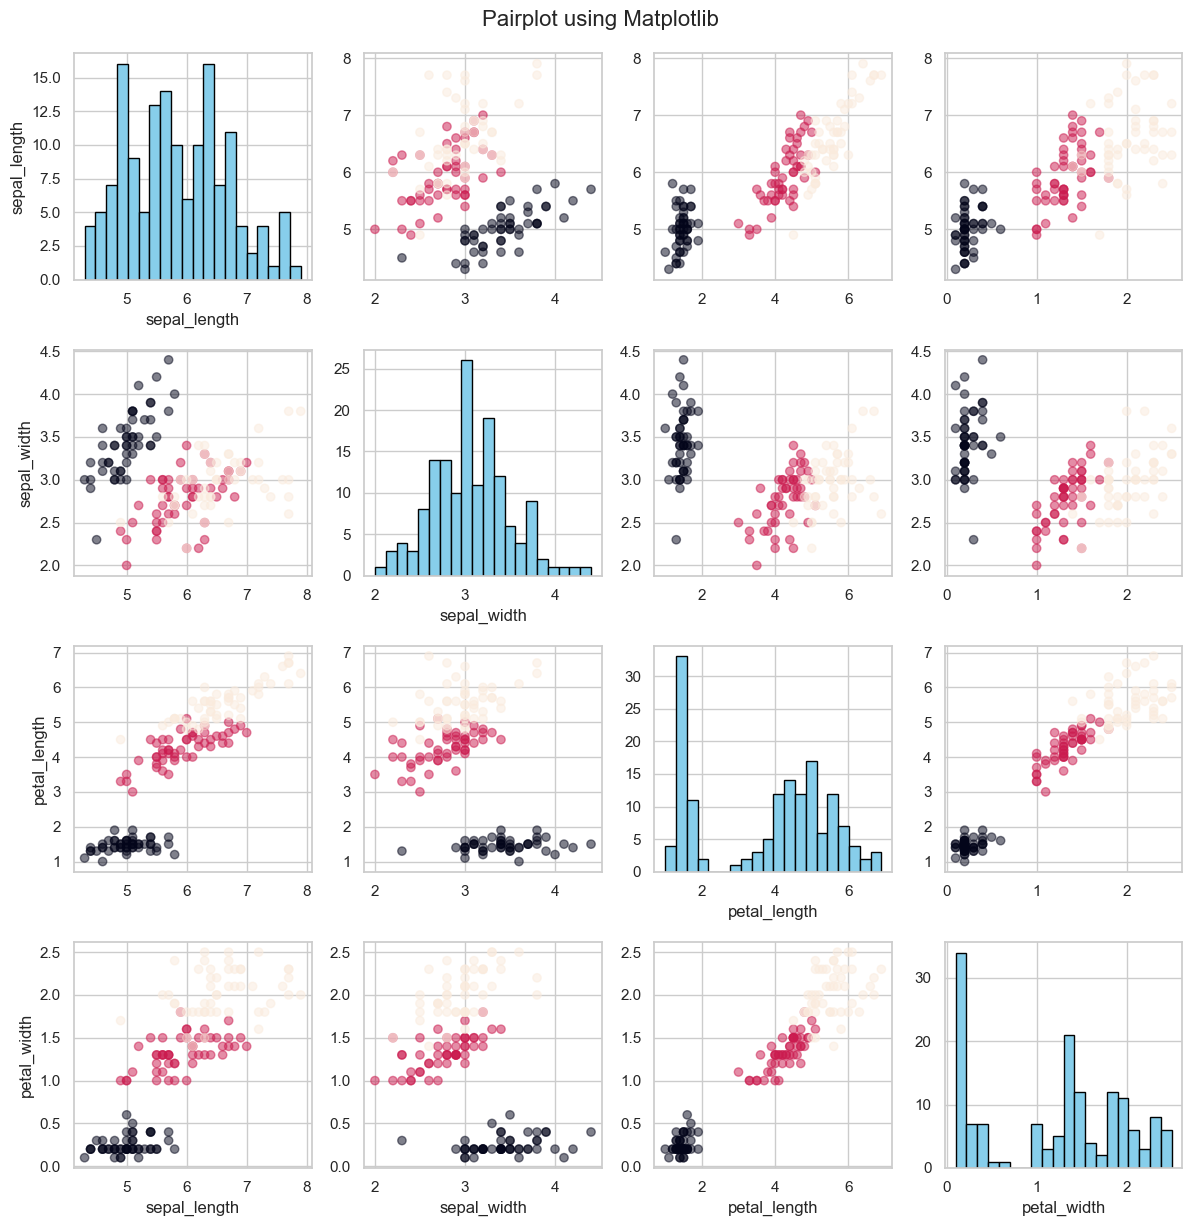

In [46]:
plt.figure(figsize=(12, 12))
for i, col1 in enumerate(features):
    for j, col2 in enumerate(features):
        plt.subplot(len(features), len(features), i * len(features) + j + 1)
        if i == j:
            plt.hist(df[col1], bins=20, color="skyblue", edgecolor="black")
            plt.xlabel(col1)
        else:
            plt.scatter(df[col2], df[col1], alpha=0.5, c=pd.Categorical(df['species']).codes)
        if i == len(features) - 1:
            plt.xlabel(col2)
        if j == 0:
            plt.ylabel(col1)
plt.tight_layout()
plt.suptitle("Pairplot using Matplotlib", fontsize=16, y=1.02)
plt.show()

#Tässä osassa käytetään Seaborn-kirjaston pairplot-toimintoa.  

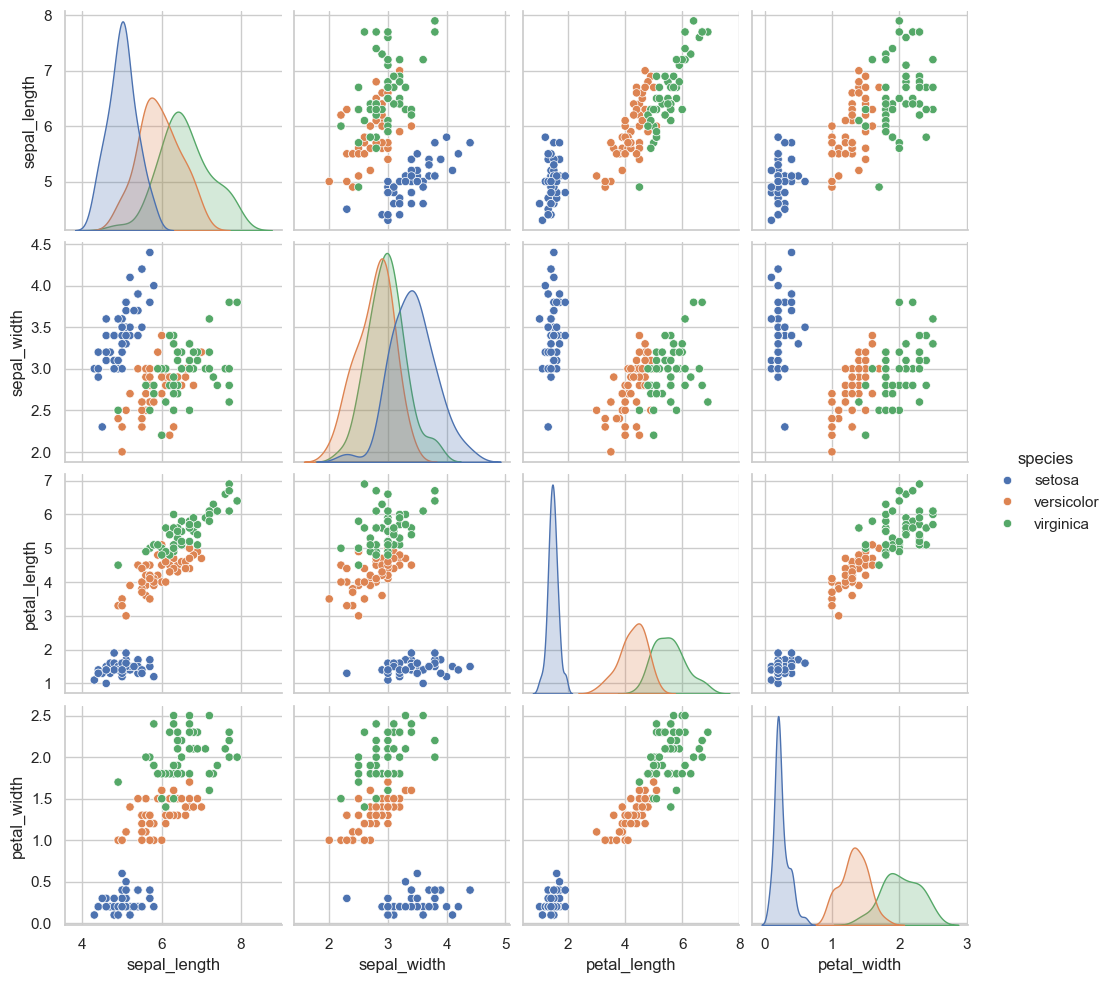

In [47]:
sns.pairplot(df, hue="species")


#Tässä osassa esitetään, kuinka monta yötä ihmiset viettivät Lapissa vuosina 2018–2022.  
Tiedot on jaettu kahteen ryhmään: suomalaiset ja ulkomaalaiset matkailijat.

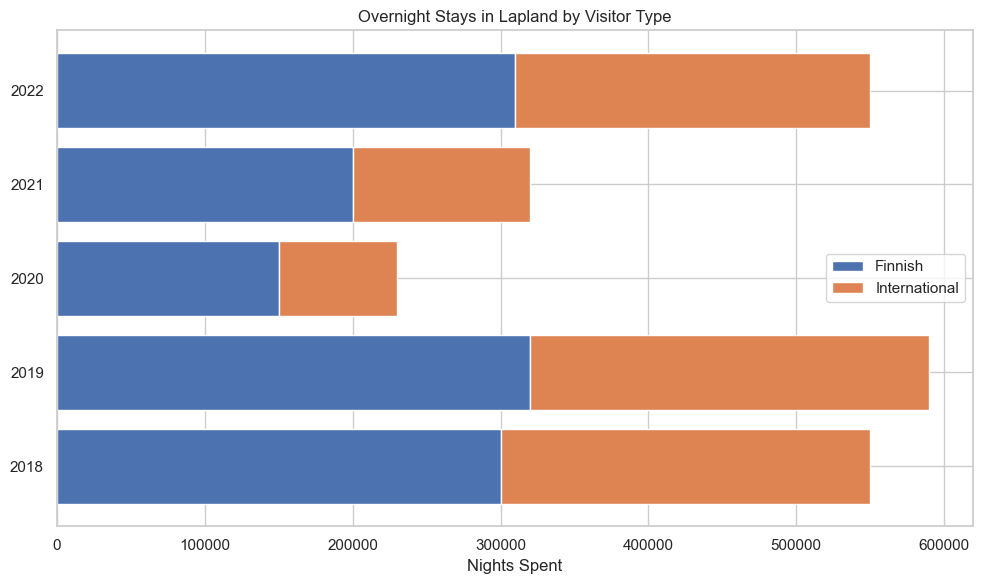

In [48]:
data = {
    "Year": ["2018", "2019", "2020", "2021", "2022"],
    "Finnish": [300000, 320000, 150000, 200000, 310000],
    "International": [250000, 270000, 80000, 120000, 240000]
}
df = pd.DataFrame(data)
df["Total"] = df["Finnish"] + df["International"]


plt.figure(figsize=(10, 6))
plt.barh(df["Year"], df["Finnish"], label="Finnish")
plt.barh(df["Year"], df["International"], left=df["Finnish"], label="International")
plt.xlabel("Nights Spent")
plt.title("Overnight Stays in Lapland by Visitor Type")
plt.legend()
plt.tight_layout()
plt.show()

Ladataan lapin yöpymisdata

In [49]:
df = pd.read_csv("yopymiset.csv", sep=";", encoding="latin1", skiprows=1)
df.columns = df.columns.str.strip()

Suodatetaan vain Lapin tiedot

In [50]:
df_lapland = df[df["Region"] == "Lapland"]

Muunnetaan kuukausittaiset sarakkeet pitkään muotoon

In [51]:
value_cols = [col for col in df_lapland.columns if "Nights spent" in col]

df_melted = df_lapland.melt(
    id_vars=["Region", "Country", "Type of accommodation establishment"],
    value_vars=value_cols,
    var_name="Period",
    value_name="Nights"
)

Poimitaan vuosi sarakkeesta Period sekä ryhmitellään vuosittain ja kansalaisuuden mukaan

In [52]:
df_melted["Year"] = pd.to_numeric(
    df_melted["Period"].str.extract(r"(\d{4})")[0],
    errors="coerce"
).astype("Int64")

df_yearly = (
    df_melted
    .groupby(["Year", "Country"])["Nights"]
    .sum()
    .reset_index()
)

Taulukkojen uudelleen järjestely ja visualisointi

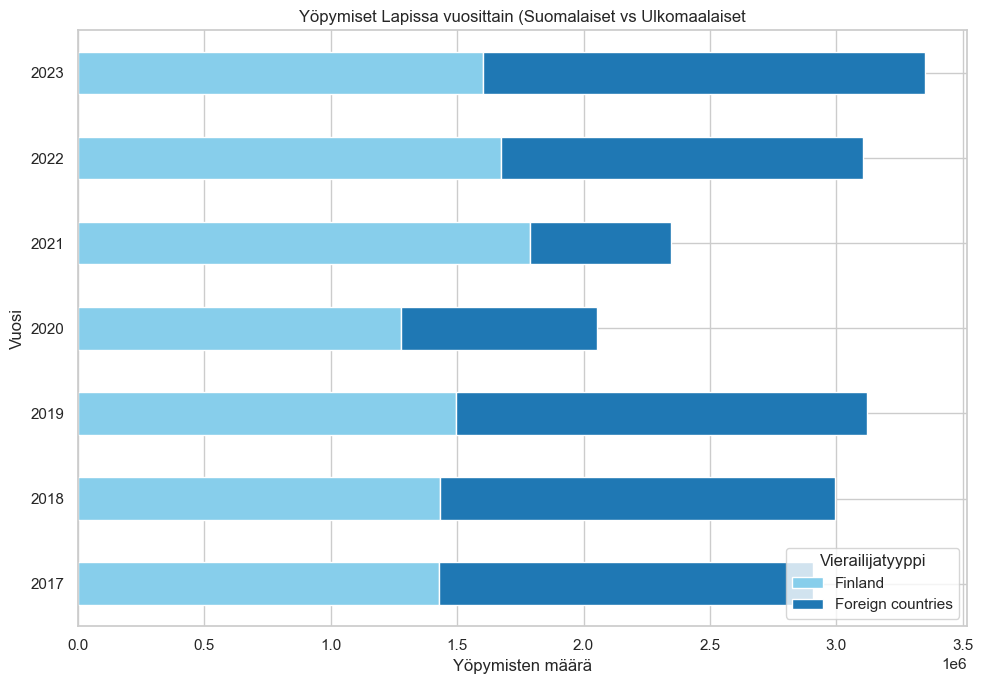

In [53]:
df_pivot = df_yearly.pivot(index="Year", columns="Country", values="Nights").fillna(0)

sns.set(style="whitegrid")
df_pivot.plot(
    kind="barh",
    stacked=True,
    figsize=(10, 7),
    color=["#87CEEB", "#1f78b4"]
)

plt.title("Yöpymiset Lapissa vuosittain (Suomalaiset vs Ulkomaalaiset")
plt.xlabel("Yöpymisten määrä")
plt.ylabel("Vuosi")
plt.legend(title="Vierailijatyyppi", loc="lower right")
plt.tight_layout()
plt.show()